In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import pytesseract
import torch

In [2]:
img = cv2.cvtColor(cv2.imread('data/IMG_20230921_224010.jpg'), cv2.COLOR_BGR2RGB)

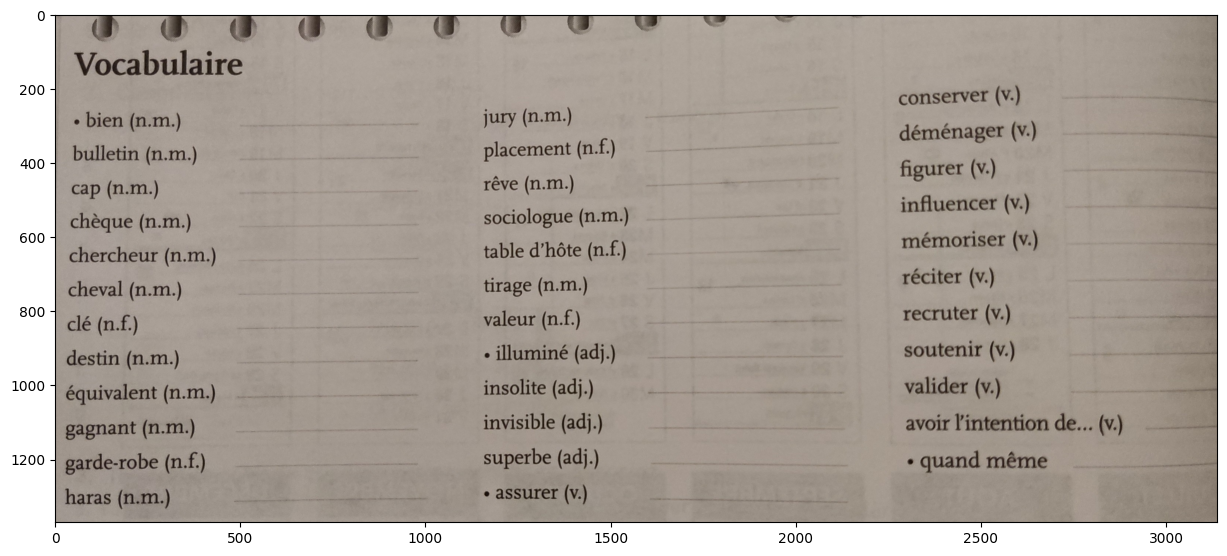

In [13]:
plt.figure(figsize=[15,10])
plt.imshow(img, cmap='gray')

In [4]:
words = pytesseract.image_to_string(img)

In [5]:
words

'© @ ©\n\nVocabulaire\n\n« bien (n.m.)\nbulletin (n.m.)\ncap (n.m.)\nchéque (n.m.)\nchercheur (n.m.)\ncheval (n.m.)\n\nclé (n.f.)\n\ndestin (n.m.)\néquivalent (n.m.)\ngagnant (n.m.)\ngarde-robe (n.f.)\n\nharas (n.m.)\n\n@\n\nwe ©\n\njury (n.m.)\nplacement (n-f.)\nréve (n.m.)\nsociologue (n.m.)\ntable d’héte (n.f.)\ntirage (n.m.)\nvaleur (n.f.)\n\n- illuminé (adj.)\ninsolite (adj.)\ninvisible (adj.)\nsuperbe (adj.)\n\n+ assurer (V.)\n\n@\n\nWw\n\nconserver (V.)\ndéménager (V.)\n\nfigurer (V.)\n\ninfluencer (Vv.)\nmémoriser (V.)\n\nréciter (v.)\n\nrecruter (V.)\n\nsoutenir (v.)\n\nvalider (v.)\n\navoir intention de... (v.)\n\n+ quand méme\n'

In [6]:
data = words.split('\n')

# Translation

In [7]:
from transformers import AutoModelForSequenceClassification, AutoModelForSeq2SeqLM, AutoTokenizer, pipeline

/home/mariano/Documentos/Projects/Anki Auto-Generator/env/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# For language detecion 
det_model_name = "papluca/xlm-roberta-base-language-detection"
det_tokenizer_name = "papluca/xlm-roberta-base-language-detection"

# Load the model 
det_model = AutoModelForSequenceClassification.from_pretrained(det_model_name)
det_tokenizer = AutoTokenizer.from_pretrained(det_tokenizer_name)

detector = pipeline("text-classification", model=det_model, tokenizer=det_tokenizer)

In [9]:
detected_language = detector(["Hallo Gutenmorgen", "Bonjour mon amie"])
print(detected_language)

[{'label': 'de', 'score': 0.8911641240119934}, {'label': 'fr', 'score': 0.993712842464447}]


In [10]:
# For language translation 
trans_model_name = "Helsinki-NLP/opus-mt-fr-es"
trans_model_tokenizer = "Helsinki-NLP/opus-mt-fr-es"

trans_model = AutoModelForSeq2SeqLM.from_pretrained(trans_model_name)
trans_tokenizer = AutoTokenizer.from_pretrained(trans_model_tokenizer)

/home/mariano/Documentos/Projects/Anki Auto-Generator/env/lib64/python3.11/site-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [11]:
origin_lang = 'fr'
target_lang = 'es'

pipeline_name = f"translation_{origin_lang}_to_{target_lang}"

translator = pipeline(pipeline_name, model=trans_model, tokenizer=trans_tokenizer)

In [12]:
results = translator(['pomme', 'pomme de terre','la nourriture'])
print(results)

[{'translation_text': 'manzana'}, {'translation_text': 'patata'}, {'translation_text': 'la comida'}]
